In [1]:
import numpy as np
np.set_printoptions(threshold=np.inf)
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
def transform(data):
    row=data.shape[0]
    col=data.shape[1]
    data_trans=np.zeros([row,col])
    for i in range(row):
        for j in range(col):
            data_trans[i][j]=math.log10(data[i][j]+0.1)
    return data_trans


In [3]:
def binarymatrix(data):
    row = data.shape[0]
    col = data.shape[1]
    data_bin = np.zeros([row, col])
    for i in range(row):
        for j in range(col):
            if data[i][j] > 0:
                data_bin[i][j] = 1
            else:
                data_bin[i][j] = 0
    return data_bin

In [4]:
Xtraindata= np.loadtxt(open("H2W3 data files/Xtrain.csv"), delimiter=",")
Ytraindata=np.loadtxt(open("H2W3 data files/ytrain.csv"), delimiter=",")
Xtestdata= np.loadtxt(open("H2W3 data files/Xtest.csv"), delimiter=",")
Ytestdata=np.loadtxt(open("H2W3 data files/ytest.csv"), delimiter=",")

In [5]:
#preprocessing traindata
Xtrain=np.zeros([Xtraindata.shape[0],Xtraindata.shape[1]-2])
#remove feature 56 and 57
Xtrain=Xtraindata[:,0:55]
#zero mean and unit variance
Xtrain_trans=transform(Xtrain)
Xtrain_bin=binarymatrix(Xtrain)


In [6]:
#preprocessing testdata
Xtest=np.zeros([Xtestdata.shape[0],Xtestdata.shape[1]-2])
Xtest=Xtestdata[:,0:55]


scaler_std = StandardScaler()
scaler_std.fit(Xtrain) # compute the mean and variance for the training set
Xtrain_standard = scaler_std.transform(Xtrain)
Xtest_standard = scaler_std.transform(Xtest)

In [7]:
Xtest_trans=transform(Xtest)
Xtest_bin=binarymatrix(Xtest)

In [8]:
λ_range = np.logspace(-5, 5, 100)
CV=StratifiedKFold(n_splits=5,shuffle=True)
#standardize data
print('standardized the feature')
stand_ACC=np.zeros([len(λ_range),5])
stand_final_ACC=np.zeros(len(λ_range))
for k in range(5):
    for i in range(len(λ_range)):
        Log_Reg = LogisticRegression(penalty='l2', C=1 /λ_range[i],solver='newton-cg',max_iter=500)
        stand_acc = cross_val_score(Log_Reg, Xtrain_standard, Ytraindata, cv=CV)
        stand_ACC[i][k]=np.mean(stand_acc)

for i in range(len(λ_range)):
    stand_final_ACC[i]=np.mean(stand_ACC[i])
stand_index = np.where(stand_final_ACC == np.amax(stand_final_ACC))
stand_lambda=λ_range[stand_index][0]


print('best λ=',stand_lambda)
print('average cross-validation error from the validation sets={}'.format(1-stand_final_ACC[stand_index][0]))


standardized the feature
best λ= 0.00025950242113997375
average cross-validation error from the validation sets=0.07543230016313218


In [9]:
#print('average cross-validation error from the validation sets={}'.format(1-stand_final_ACC[stand_index][0]))
Log_Reg = LogisticRegression(penalty='l2', C=1/stand_lambda, solver='newton-cg',max_iter=500)
Log_Reg.fit(Xtrain_standard,Ytraindata)
stand_train_pre= Log_Reg.predict(Xtrain_standard)
stand_test_pre=Log_Reg.predict(Xtest_standard)
stand_alltrain_err=1-accuracy_score(Ytraindata,stand_train_pre)
stand_test_err=1-accuracy_score(Ytestdata,stand_test_pre)

print('error on the full given training set=',stand_alltrain_err)
print('error on the full given test set=',stand_test_err)
print(' ')

error on the full given training set= 0.07079934747145189
error on the full given test set= 0.076171875
 


In [10]:
#Transform the features using log(xij + 0.1)
print('transformed the features using log(xij + 0.1)')
trans_ACC=np.zeros([len(λ_range),5])
trans_final_ACC=np.zeros(len(λ_range))
for k in range(5):
    for i in range(len(λ_range)):
        Log_Reg = LogisticRegression(penalty='l2', C=(1/λ_range[i]),solver='newton-cg',max_iter=500)
        trans_acc = cross_val_score(Log_Reg, Xtrain_trans, Ytraindata, cv=CV)
        trans_ACC[i][k]=np.mean(trans_acc)

for i in range(len(λ_range)):
    trans_final_ACC[i]=np.mean(trans_ACC[i])
trans_index = np.where(trans_final_ACC == np.amax(trans_final_ACC))
trans_lambda=λ_range[trans_index][0]
print('best λ={}'.format(trans_lambda))
print('average cross-validation error from the validation sets={}'.format(1-trans_final_ACC[trans_index][0]))

transformed the features using log(xij + 0.1)
best λ=1.7886495290574351
average cross-validation error from the validation sets=0.057357259380097836


In [11]:
Log_Reg = LogisticRegression(penalty='l2', C=(1 /trans_lambda), solver='newton-cg',max_iter=500)
Log_Reg.fit(Xtrain_trans,Ytraindata)
trans_train_pre= Log_Reg.predict(Xtrain_trans)
trans_test_pre=Log_Reg.predict(Xtest_trans)
trans_alltrain_err=1-accuracy_score(Ytraindata,trans_train_pre)
trans_test_err=1-accuracy_score(Ytestdata,trans_test_pre)

print('error on the full given training set =',trans_alltrain_err)
print('error on the full given test set =',trans_test_err)
print(' ')

error on the full given training set = 0.054812398042414334
error on the full given test set = 0.05598958333333337
 


In [12]:
print('binarze the features using I(xij > 0)')
bin_ACC=np.zeros([len(λ_range),5])
bin_final_ACC=np.zeros(len(λ_range))
for k in range(5):
    for i in range(len(λ_range)):
        Log_Reg = LogisticRegression(penalty='l2', C=(1/λ_range[i]),solver='newton-cg',max_iter=500)
        bin_acc = cross_val_score(Log_Reg, Xtrain_bin, Ytraindata, cv=CV)
        bin_ACC[i][k]=np.mean(bin_acc)
for i in range(len(λ_range)):
    bin_final_ACC[i]=np.mean(bin_ACC[i])
bin_index = np.where(bin_final_ACC == np.amax(bin_final_ACC))
bin_lambda=λ_range[bin_index][0]
print('best λ={}'.format(bin_lambda))
print('average cross-validation error from the validation sets = {}'.format(1-bin_final_ACC[bin_index][0]))

binarze the features using I(xij > 0)
best λ=5.72236765935022
average cross-validation error from the validation sets = 0.0683849918433932


In [13]:
Log_Reg = LogisticRegression(penalty='l2', C=(1 / bin_lambda), solver='newton-cg',max_iter=1000)
Log_Reg.fit(Xtrain_bin,Ytraindata)
bin_train_pre= Log_Reg.predict(Xtrain_bin)
bin_test_pre=Log_Reg.predict(Xtest_bin)
bin_alltrain_err=1-accuracy_score(Ytraindata,bin_train_pre)
bin_test_err=1-accuracy_score(Ytestdata,bin_test_pre)

print('error on the full given training set=',bin_alltrain_err)
print('error on the full given test set=',bin_test_err)
print(' ')

error on the full given training set= 0.06394779771615011
error on the full given test set= 0.076171875
 


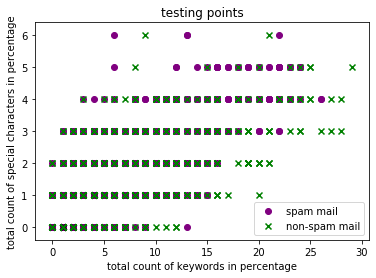

In [17]:
#B.additional question
N=Xtest_bin.shape[0]
x=np.zeros(N)
y=np.zeros(N)
for i in range(N):
    for j in range(48):
        x[i]+=Xtest_bin[i][j]
    for k in range(48,54):
        y[i]+=Xtest_bin[i][k]

x_spam=[]
y_spam=[]
x_notspam=[]
y_notspam=[]
for i in range(N):
    if Ytestdata[i]==1:
        x_spam.append(x[i])
        y_spam.append(y[i])
    else:
        x_notspam.append(x[i])
        y_notspam.append(y[i])


plt.scatter(x_spam,y_spam,color = 'purple',marker='o', label="spam mail")
plt.scatter(x_notspam,y_notspam,color = 'green',marker='x', label="non-spam mail")
plt.title("testing points")
plt.xlabel('total count of keywords in percentage')
plt.ylabel('total count of special characters in percentage')
plt.legend(loc = "best")
plt.show()
print(' ')

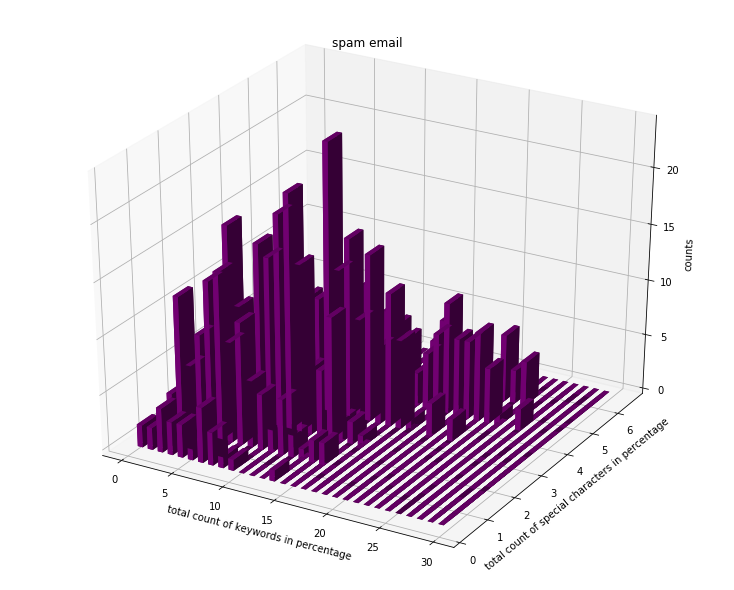

In [15]:
#(ii)
fig = plt.figure(figsize=(10,8))
ax_spam = Axes3D(fig)
hist_spam, xedges_spam, yedges_spam = np.histogram2d(x_spam, y_spam, bins=30, range=[[0, 30], [0, 6]])
# Construct arrays for the anchor positions of the 16 bars.
xpos_spam, ypos_spam = np.meshgrid(xedges_spam[:-1] + 0.25, yedges_spam[:-1] + 0.25, indexing="ij")
xpos_spam = xpos_spam.ravel()
ypos_spam = ypos_spam.ravel()
zpos_spam = 0

# Construct arrays with the dimensions for the 16 bars.
dx_spam = dy_spam = 0.5 * np.ones_like(zpos_spam)
dz_spam = hist_spam.ravel()

ax_spam.bar3d(xpos_spam, ypos_spam, zpos_spam, dx_spam, dy_spam, dz_spam, zsort='average',color="purple")
plt.title("spam email")
plt.xlabel('total count of keywords in percentage')
plt.ylabel('total count of special characters in percentage')
ax_spam.set_zlabel('counts')
plt.show()

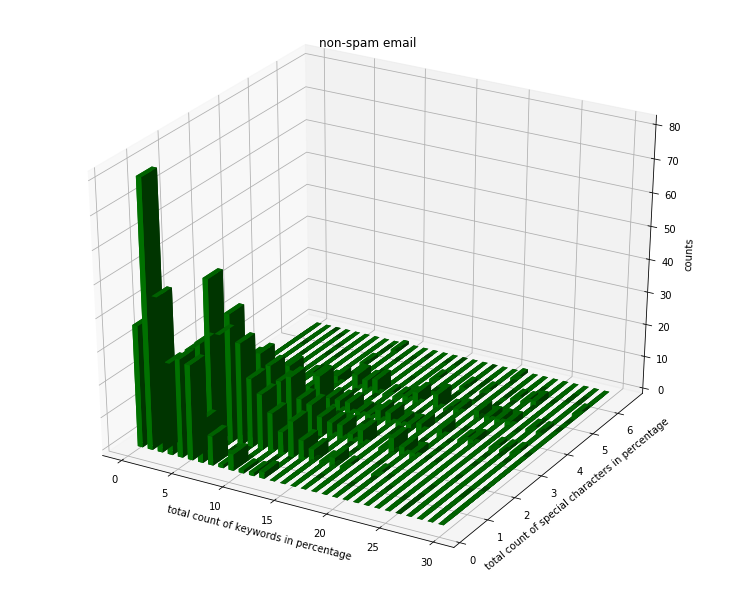

In [16]:
#(iii)
fig = plt.figure(figsize=(10,8))
ax_nonspam = Axes3D(fig)
hist_nonspam, xedges_nonspam, yedges_nonspam = np.histogram2d(x_notspam, y_notspam, bins=30, range=[[0, 30], [0, 6]])
# Construct arrays for the anchor positions of the 16 bars.
xpos_nonspam, ypos_nonspam = np.meshgrid(xedges_nonspam[:-1] + 0.25, yedges_nonspam[:-1] + 0.25, indexing="ij")
xpos_nonspam = xpos_nonspam.ravel()
ypos_nonspam = ypos_nonspam.ravel()
zpos_nonspam = 0

# Construct arrays with the dimensions for the 16 bars.
dx_nonspam = dy_nonspam = 0.5 * np.ones_like(zpos_nonspam)
dz_nonspam = hist_nonspam.ravel()

ax_nonspam.bar3d(xpos_nonspam, ypos_nonspam, zpos_nonspam, dx_nonspam, dy_nonspam, dz_nonspam, zsort='average',color="green")
plt.title("non-spam email")
plt.xlabel('total count of keywords in percentage')
plt.ylabel('total count of special characters in percentage')
ax_nonspam.set_zlabel('counts')
plt.show()